In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning

In [32]:
df_train = pd.read_csv('./data/train.csv', index_col = 0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Discard all columns with more than 20% of the values are NaN (or null-type)

In [34]:
df_train = df_train.dropna(thresh=df_train.shape[0]*0.8,how='all',axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Splitting into X_train set (independent variables) and y_train set (dependent variable)

In [35]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

In [36]:
# Categorical/Numerical Separation
categorical_features = X_train.select_dtypes(include=['object']).columns
print('Categorical independent variables:\n', categorical_features)
numerical_features = X_train.select_dtypes(exclude = ["object"]).columns
print('Numerical independent variables:\n', numerical_features)

Categorical independent variables:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical independent variables:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', '

Correlation Matrix

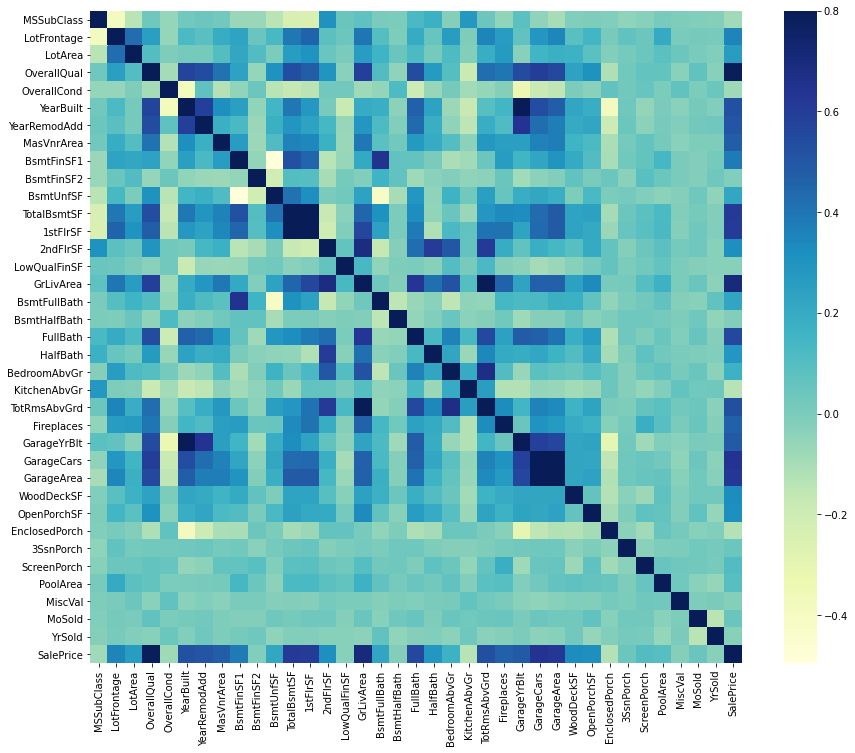

In [37]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");

In [38]:
categorical_indices = np.argwhere(X_train.columns.isin(X_train.select_dtypes(include = ["object"])))
numerical_indices = np.argwhere(X_train.columns.isin(X_train.select_dtypes(exclude = ["object"])))

In [39]:
print('Categorical Indices:', categorical_indices.reshape(-1))
print('Numerical Indices:', numerical_indices.reshape(-1))

Categorical Indices: [ 1  4  5  6  7  8  9 10 11 12 13 14 19 20 21 22 23 25 26 27 28 29 30 31
 33 37 38 39 40 51 53 55 57 60 61 62 72 73]
Numerical Indices: [ 0  2  3 15 16 17 18 24 32 34 35 36 41 42 43 44 45 46 47 48 49 50 52 54
 56 58 59 63 64 65 66 67 68 69 70 71]


In [40]:
X_train.iloc[:, categorical_indices.reshape(-1)]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [41]:
for col in categorical_indices.reshape(-1):
    print(X_train.columns[col], X_train.iloc[:, col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

From that, I can Label Encode columns with 2 unique categories and One Hot Encode columns with 3 or more unique categories

In [42]:
label_encode_col = ['Street', "Utilities", "CentralAir"]
onehot_encode_col = X_train.iloc[:, categorical_indices.reshape(-1)].columns[X_train.iloc[:, categorical_indices.reshape(-1)].columns.isin(label_encode_col) == False]
onehot_encode_col = list(onehot_encode_col)

In [43]:
print('Label Encode Columns:', label_encode_col)
print('Ohe Hot Encode Columns:', onehot_encode_col)

Label Encode Columns: ['Street', 'Utilities', 'CentralAir']
Ohe Hot Encode Columns: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label Encoding
for col in label_encode_col:
    lb = LabelEncoder()
    X_train.loc[:, col] = lb.fit_transform(X_train.loc[:, col])

In [45]:
# One Hot Encoding
X_train.loc[:, onehot_encode_col] = X_train.loc[:, onehot_encode_col].fillna("NoneGiven")

onehot_df = pd.get_dummies(X_train.loc[:, onehot_encode_col],drop_first=True)

In [46]:
new_Xtrain = pd.concat([X_train.loc[:, numerical_features], X_train.loc[:, label_encode_col], onehot_df], axis=1)

In [47]:
new_Xtrain = new_Xtrain.apply(lambda x: x.fillna(x.mean()),axis=0)

Convert all 'Year' independent variables to 'Age' to better fit for a regression model

In [48]:
years_col = ['YearBuilt', 'YearRemodAdd', 'YrSold']
for col in years_col:
    new_Xtrain.loc[:, col] = 2020 - new_Xtrain.loc[:, col]

In [49]:
new_Xtrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,17,17,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,44,44,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,19,18,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,105,50,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,20,20,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,21,20,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,42,32,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,79,14,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0


Similarly, I can clean the X_test set with a function I created that replicate that procedure

In [50]:
from housingregression_clean_py import get_clean_data
df_test = pd.read_csv('./data/test.csv', index_col = 0)
df_test = df_test.dropna(thresh=df_test.shape[0]*0.8,how='all',axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearR

In [51]:
X_test = df_test

In [52]:
X_test = get_clean_data(X_test)

In [53]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_NoneGiven,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,59,59,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1462,20,81.0,14267,6,6,62,62,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1463,60,74.0,13830,5,5,23,22,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1464,60,78.0,9978,6,6,22,22,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1465,120,43.0,5005,8,5,28,28,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,50,50,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2916,160,21.0,1894,4,5,50,50,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2917,20,160.0,20000,5,7,60,24,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0


Dropping columns exist in new_Xtrain but not in X_test since it's certainly not the determining factor to predict y_test and vice versa

In [54]:
new_Xtrain = new_Xtrain.loc[:, new_Xtrain.columns.isin(X_test.columns)]
X_test = X_test.loc[:, X_test.columns.isin(new_Xtrain.columns)]

In [55]:
y_test = pd.read_csv("./data/sample_submission.csv", index_col=0)

In [56]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
new_Xtrain = kpca.fit_transform(new_Xtrain)
X_test = kpca.transform(X_test)